In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Код из методички

Загрузите данные о пассажирах Титаника и познакомьтесь со структурой датасета.


In [ ]:
training_set = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML5.5%20EDA/data/titanic.csv')
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
training_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
training_set.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Проведите анализ и визуализацию каждого признака датасета. Сделайте вывод о виде распределения и шкале каждого признака.


In [ ]:
def custom_hist(training_set, title,  xlabel, ylabel='Количество', bins=None):
    figsize = (20,6)
    plt.figure(figsize=figsize)
    plt.grid(True)
    plt.title(title)
    plt.hist(training_set, training_set.max().astype(int) if bins is None else bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

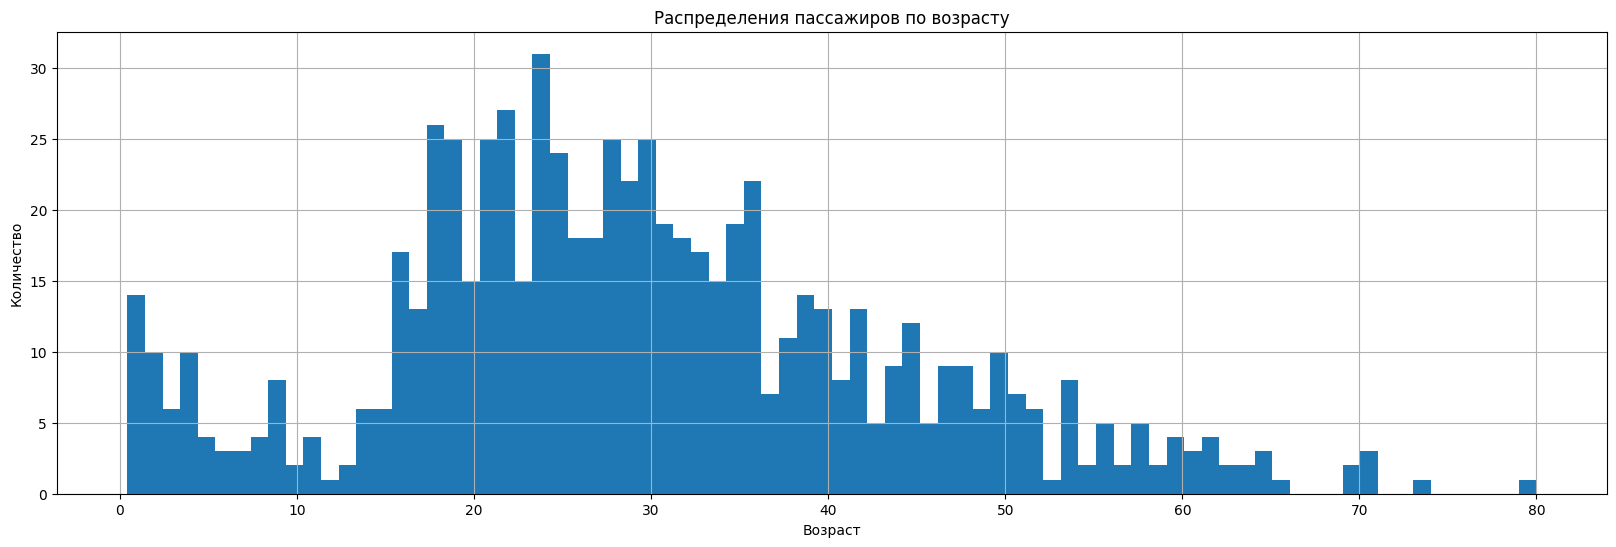

In [ ]:
custom_hist(training_set["Age"], 'Распределения пассажиров по возрасту', 'Возраст')

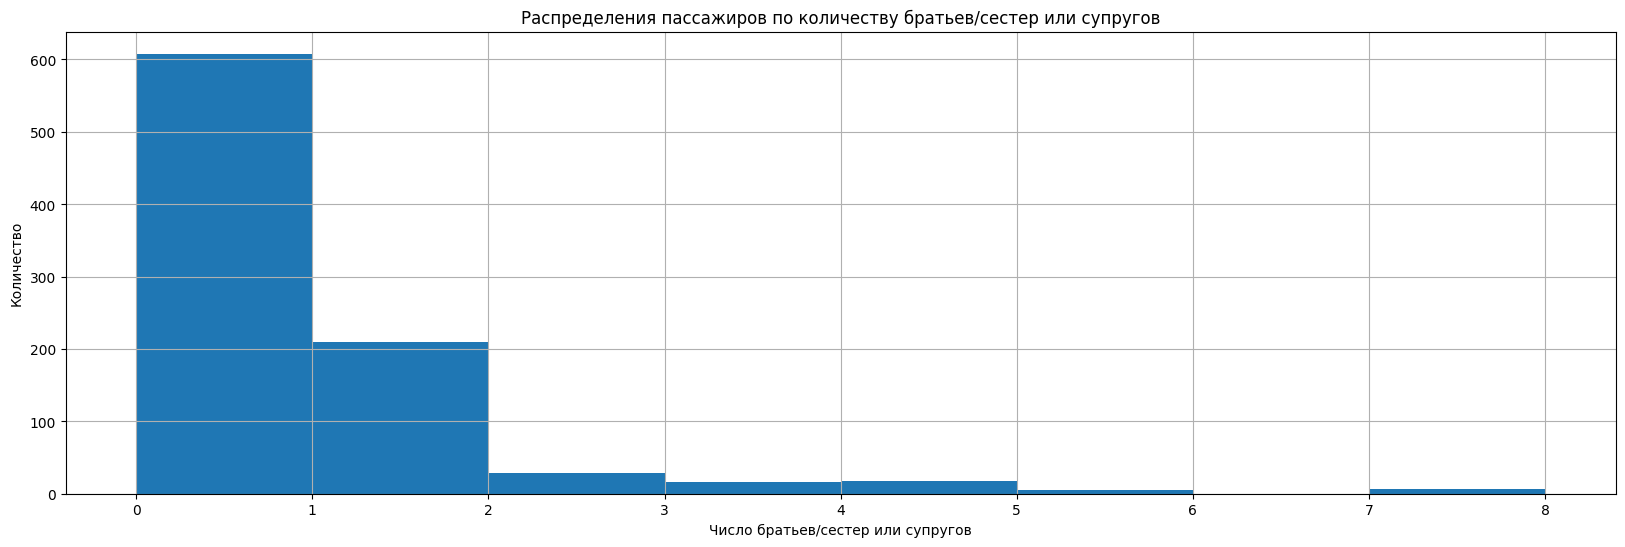

In [ ]:
custom_hist(training_set["SibSp"], 'Распределения пассажиров по количеству братьев/сестер или супругов',
  'Число братьев/сестер или супругов')

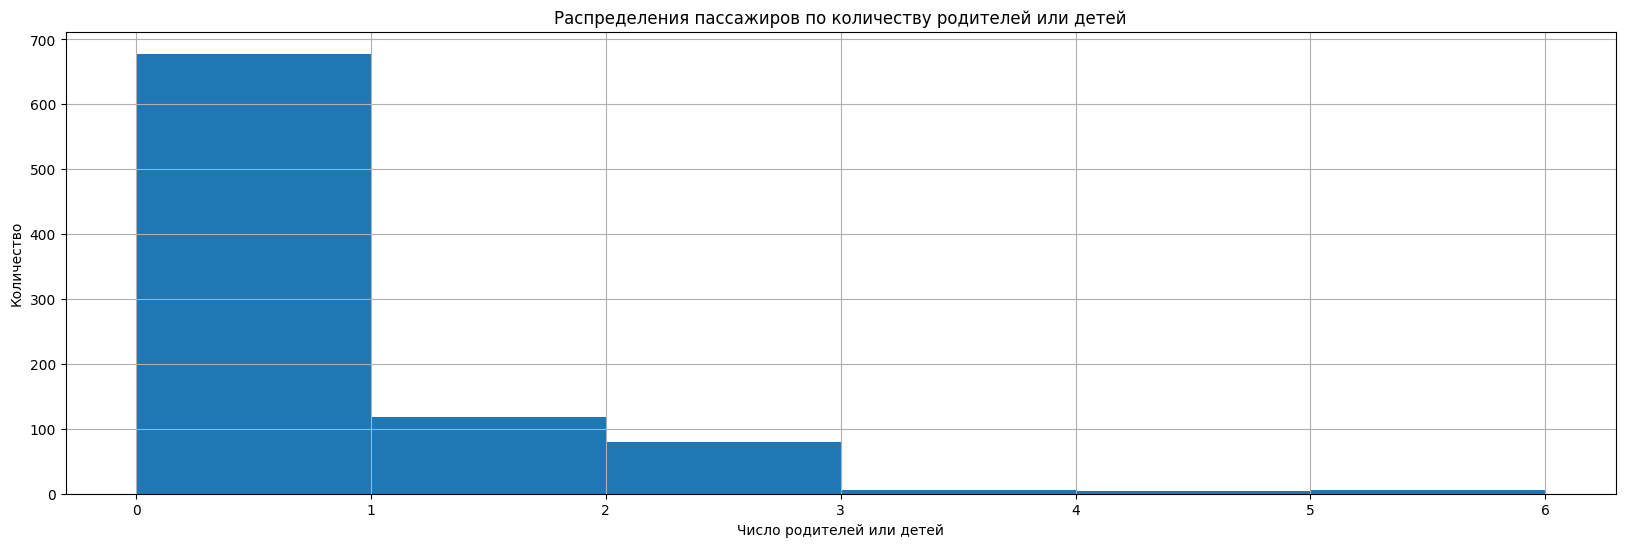

In [ ]:
custom_hist(training_set["Parch"], 'Распределения пассажиров по количеству родителей или детей',
  'Число родителей или детей')

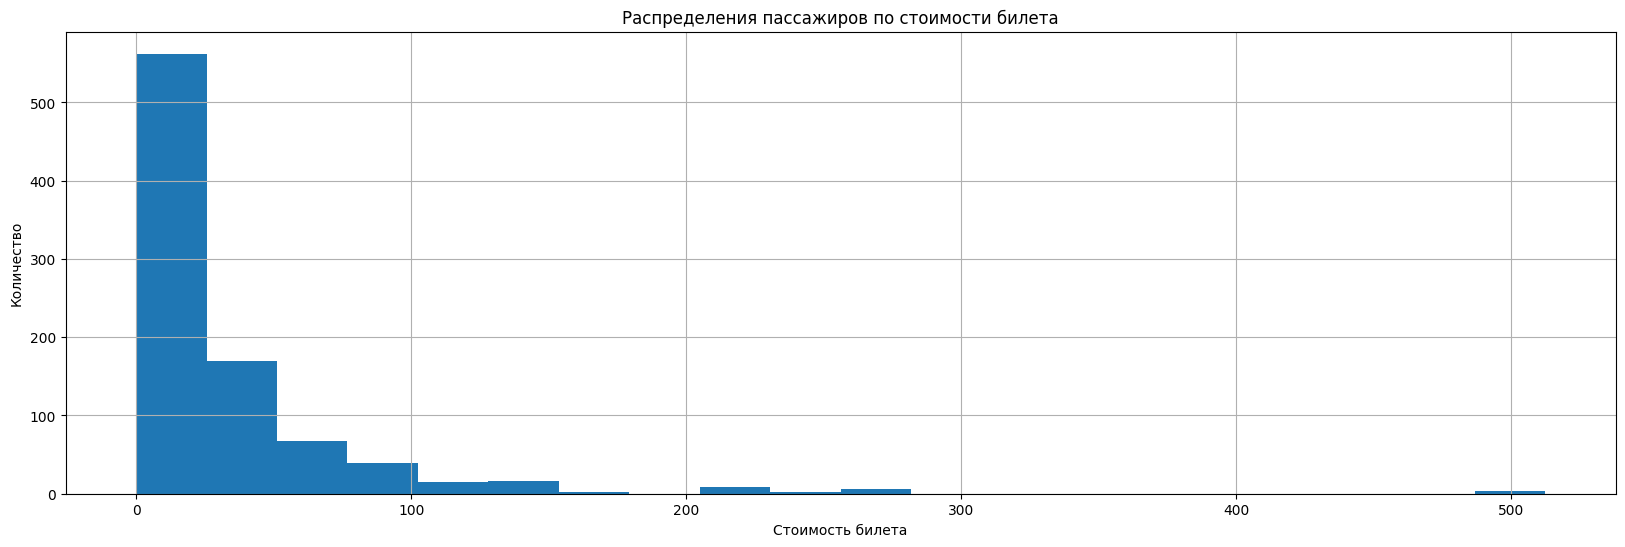

In [ ]:
custom_hist(training_set["Fare"], 'Распределения пассажиров по стоимости билета',
  'Стоимость билета', bins=20)

<Axes: ylabel='Frequency'>

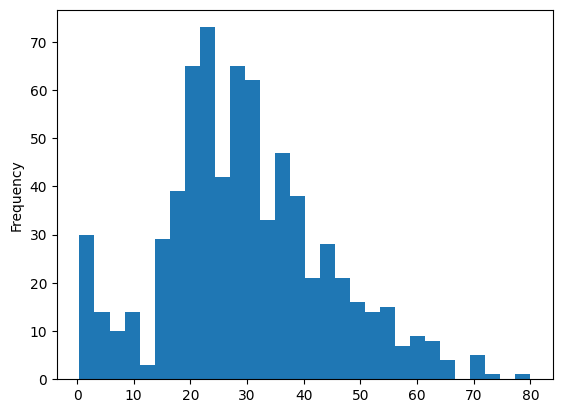

In [ ]:
training_set['Age'].plot.hist(bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

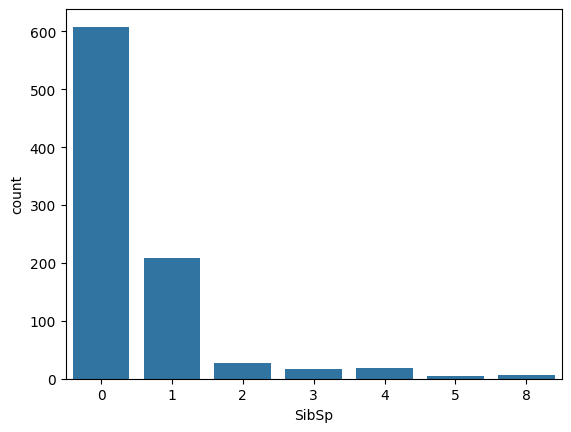

In [ ]:
sns.countplot(x='SibSp', data=training_set)

<Axes: >

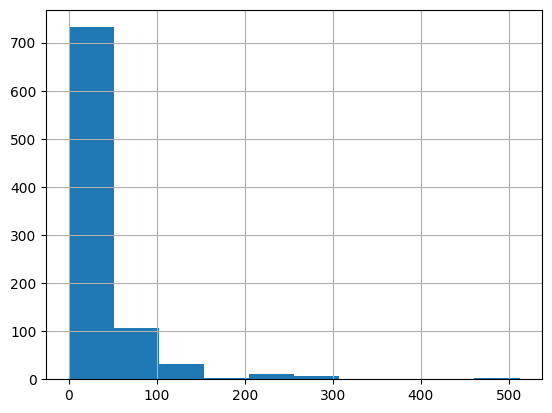

In [ ]:
training_set['Fare'].hist()

<Axes: >

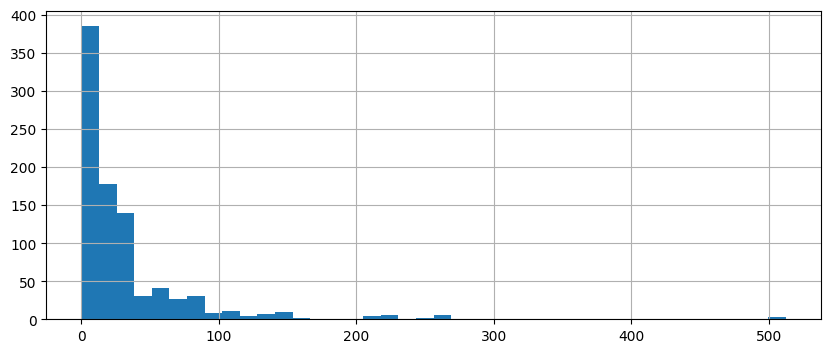

In [ ]:
training_set['Fare'].hist(bins=40, figsize=(10,4))

<Axes: xlabel='Survived', ylabel='count'>

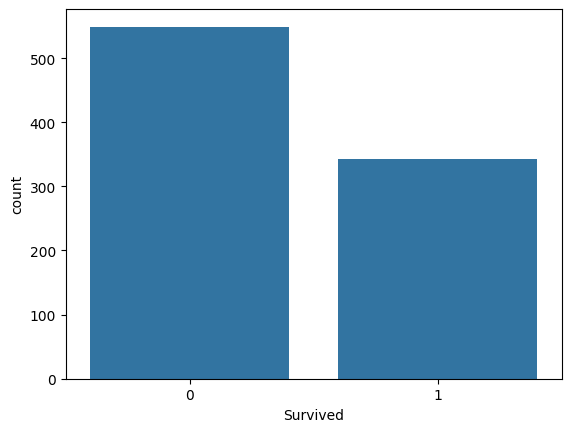

In [ ]:
sns.countplot(x='Survived', data=training_set)

<Axes: xlabel='Survived', ylabel='count'>

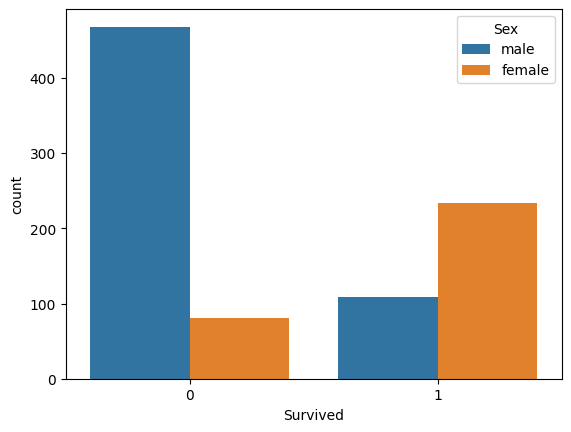

In [ ]:
sns.countplot(x='Survived', data=training_set, hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

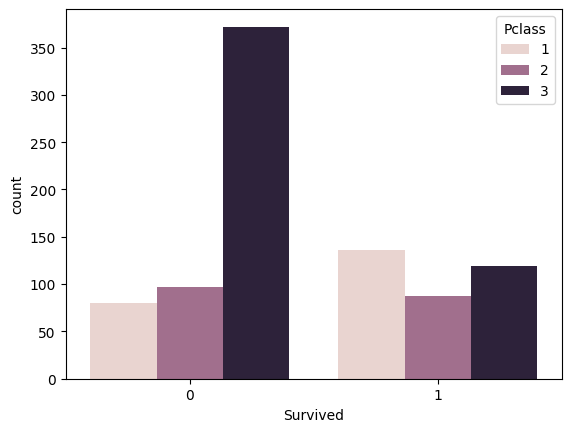

In [ ]:
sns.countplot(x='Survived', data=training_set, hue='Pclass')

<Axes: xlabel='Pclass', ylabel='Age'>

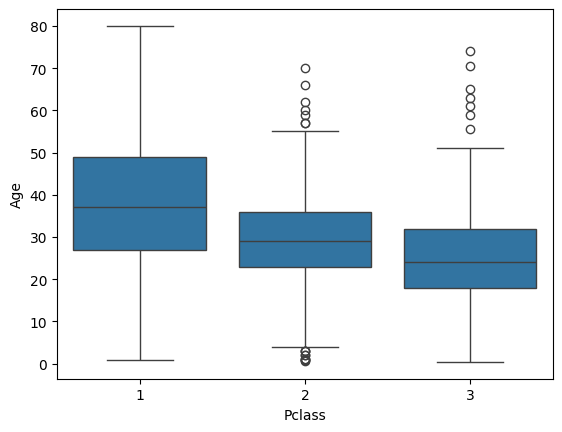

In [ ]:
sns.boxplot(x='Pclass', y='Age', data=training_set)

Проанализируйте влияние каждого признака на целевую переменную. Проиллюстрируйте ее графиками.

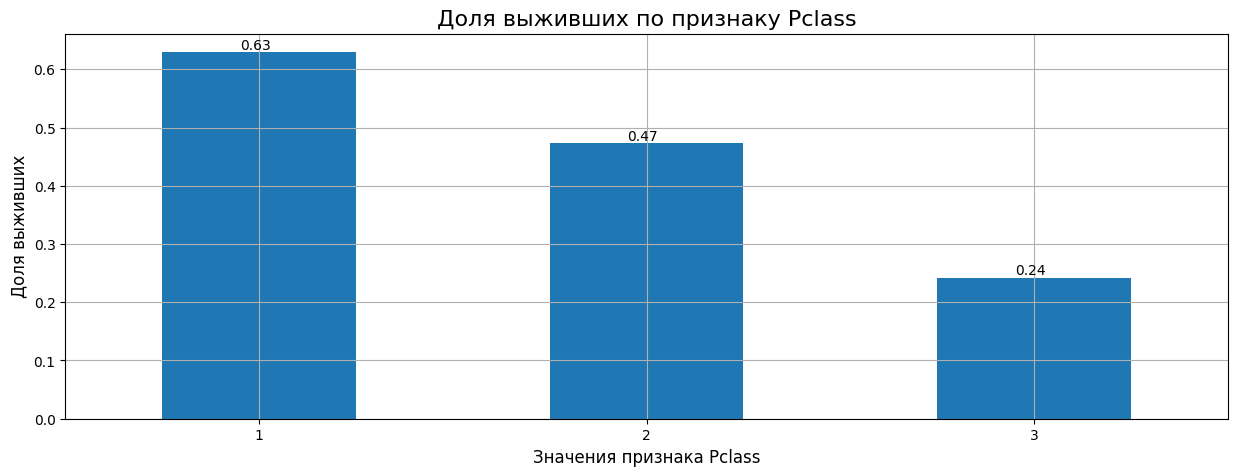

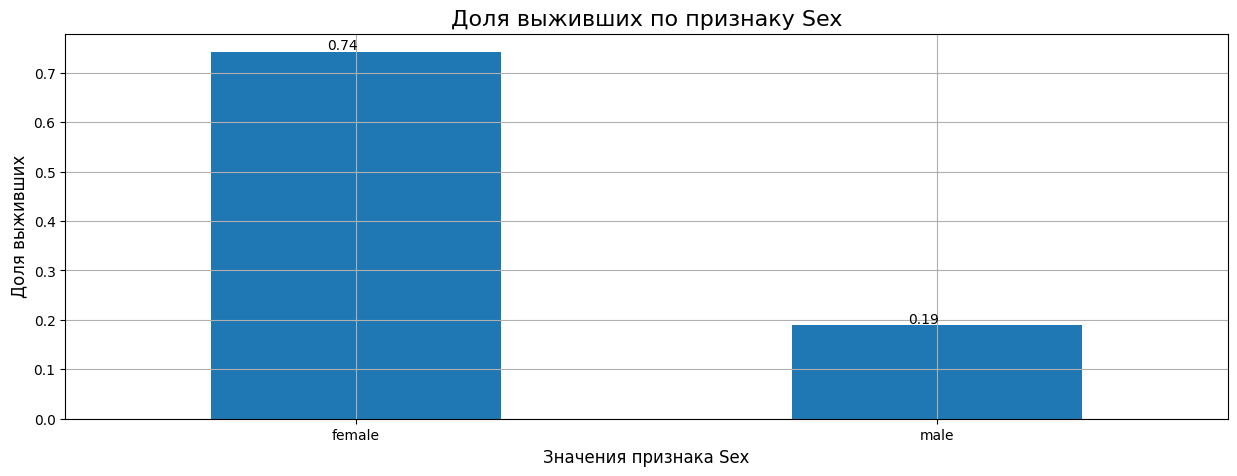

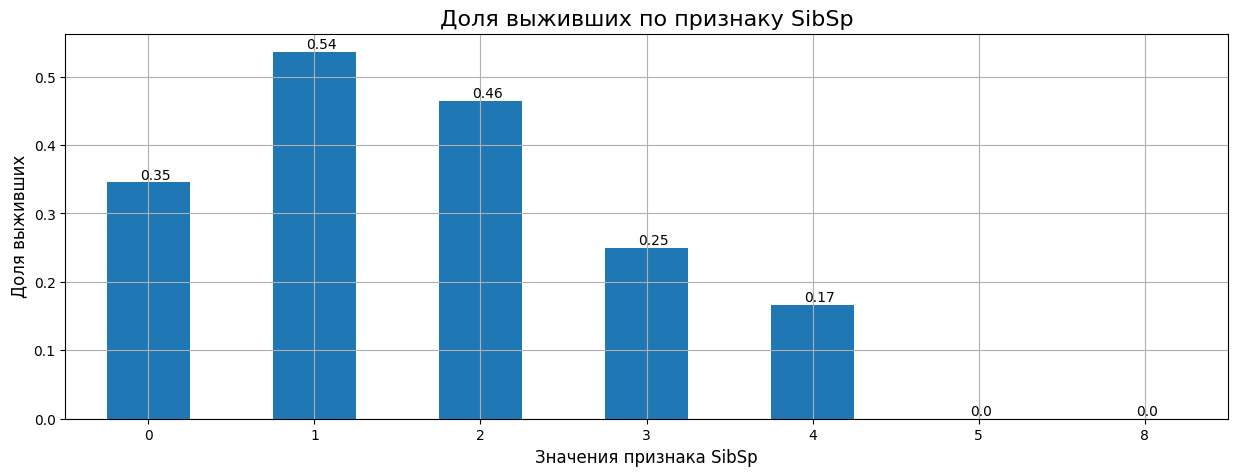

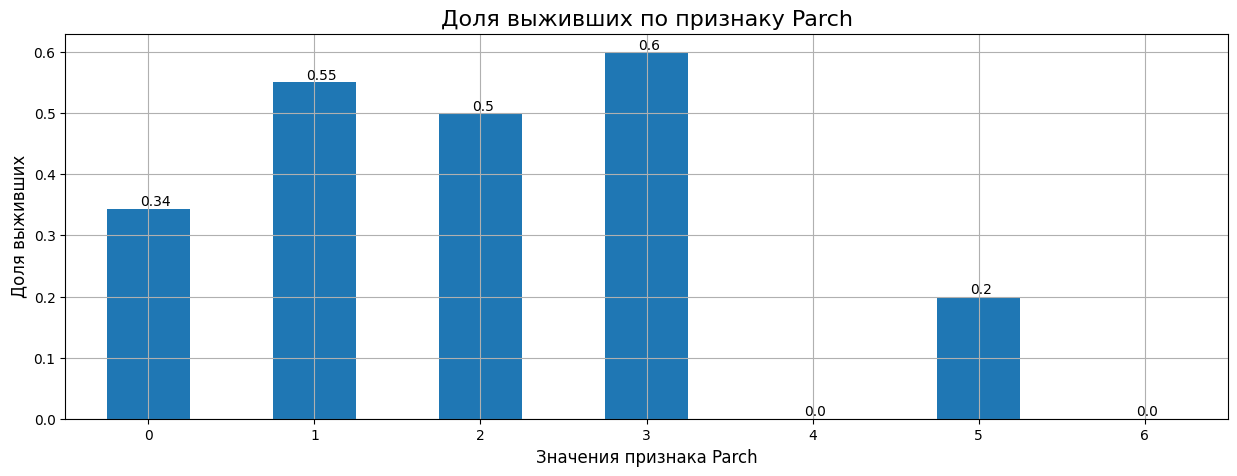

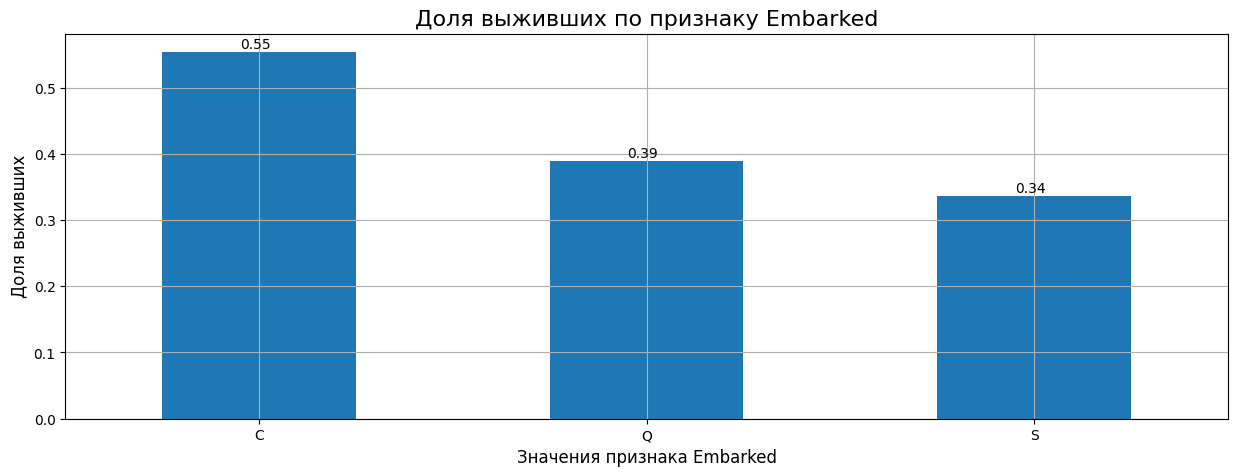

In [ ]:
columns_to_look = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for column in columns_to_look:
    pivot = training_set.pivot_table(index=column, values='Survived', aggfunc='mean')

    fig, ax = plt.subplots(figsize=(15,5))
    ax.set_title(f'Доля выживших по признаку {column}', fontdict={'size': 16})
    ax.set_ylabel('Доля выживших', fontdict={'size': 12})
    ax.set_xlabel(column, fontdict={'size': 12})

    for cnt in range(pivot.shape[0]):
        value = pivot.iloc[cnt].values[0]
        ax.text(cnt - .05, value + .005, round(value, 2))

    pivot.plot(kind='bar', rot=0, grid=True, legend=False, ax=ax)
    ax.set_xlabel(f'Значения признака {column}', fontdict={'size': 12})
    plt.show()


Исследуйте и исправьте при необходимости пропущенные значения в датасете.

In [ ]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
training_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

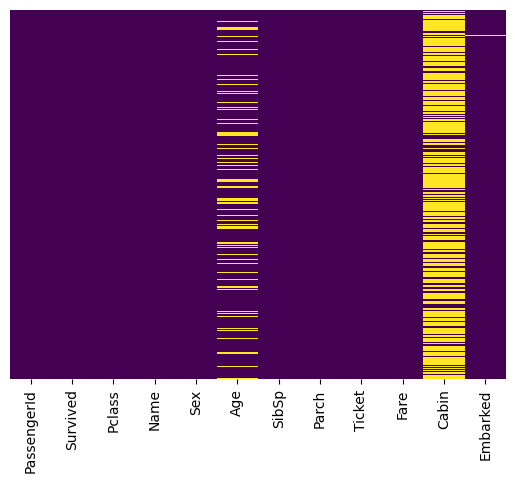

In [ ]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
training_set.drop('Cabin', axis=1, inplace=True)

<Axes: >

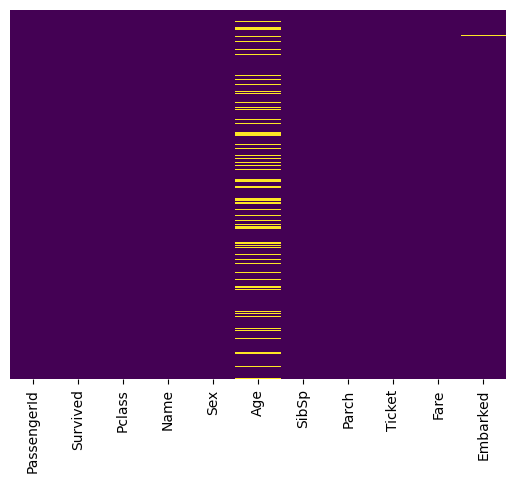

In [ ]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
training_set.dropna(inplace=True)

<Axes: >

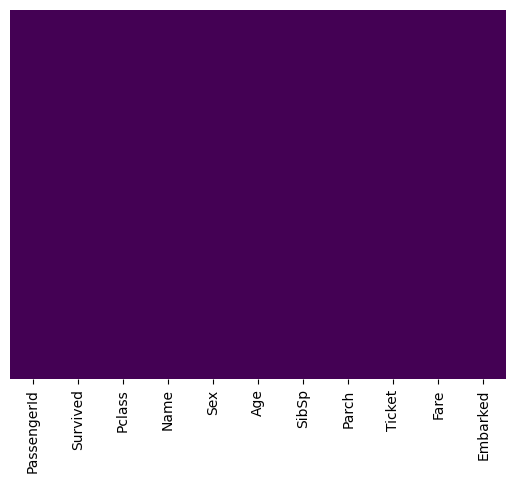

In [ ]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')


Преобразуйте категориальные признаки в численные самым подходящим способом.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(training_set['Sex'])

In [ ]:
training_set['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
np.unique(cat_enc_le)

array([0, 1])

In [ ]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(training_set[['Embarked']])  # Вызываем метод fit_transform, возвращает разреженную матрицу из библиотеки Scipy

In [ ]:
training_set.shape

(712, 11)

In [ ]:
cat_enc_ohe.shape

(712, 3)

In [ ]:
pd.get_dummies(training_set['Sex']).astype(int).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
pd.get_dummies(training_set['Sex'], drop_first=True)

,male
0,True
1,False
2,False
3,False
4,True
...,...
885,False
886,True
887,False
889,True


In [ ]:
sex = pd.get_dummies(training_set['Sex'], drop_first=True).astype(int)
embark = pd.get_dummies(training_set['Embarked'], drop_first=True).astype(int)

In [ ]:
training_set = pd.concat([training_set, sex, embark], axis=1)

In [ ]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [ ]:
training_set.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [ ]:
training_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
data_modif = training_set

# 1 Постройте по получившемуся набору данных простую модель машинного обучения и оцените ее эффективность.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(training_set.iloc[:,1:], training_set.iloc[:,0], test_size=0.33, random_state=42)
clf =  LogisticRegression().fit(X_train, y_train)
clf.score(X_test, y_test)

0.7829787234042553

Обучили модель линейной регрессии, точность низкая - модель слишком простая для этих данных

# 2 Ответьте на следующие вопросы при помощи визуализации и численных данных по исходному набору данных:

In [ ]:
training_set = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML5.5%20EDA/data/titanic.csv')

# 3 Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

Text(0.5, 1.0, 'Доля выживших')

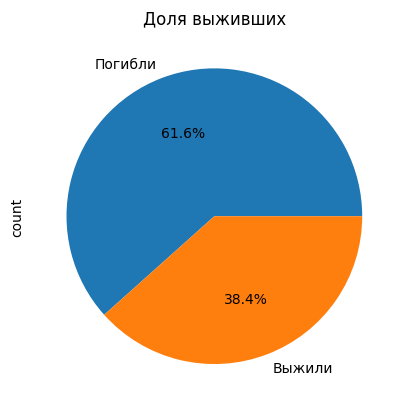

In [ ]:
training_set[['Survived']].value_counts().plot.pie(labels = ['Погибли', 'Выжили'],autopct='%1.1f%%' )
plt.title("Доля выживших")

Text(0.5, 1.0, 'Доля женщин и мужчин среди выживших')

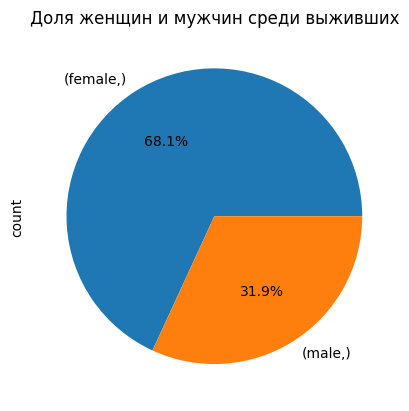

In [ ]:
survived = training_set[training_set['Survived'] == 1]
survived[['Sex']].value_counts().plot.pie(autopct='%1.1f%%' )
plt.title("Доля женщин и мужчин среди выживших")

Вывод: Большая доля людей погибла, среди выживших больше женщин

# 4 Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

Text(0.5, 1.0, 'Доля людей по классам')

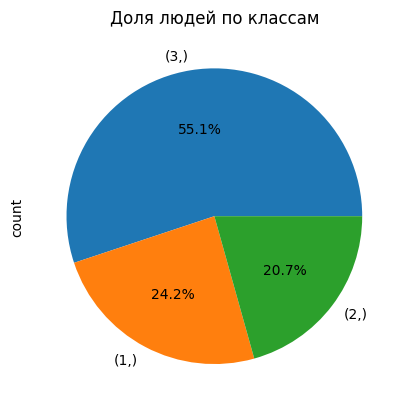

In [ ]:
training_set[['Pclass']].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Доля людей по классам")

Text(0.5, 1.0, 'Доля женщин и мужчин среди третьего класса')

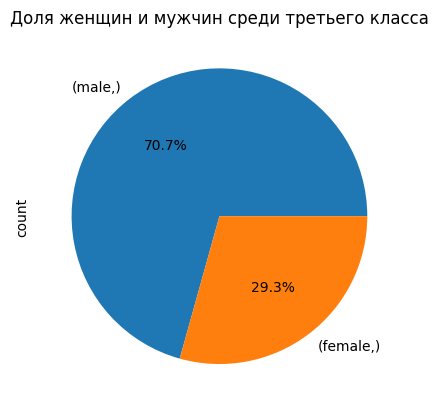

In [ ]:
class_3 = training_set[training_set['Pclass'] == 3]
class_3[['Sex']].value_counts().plot.pie(autopct='%1.1f%%' )
plt.title("Доля женщин и мужчин среди третьего класса")

Вывод: в третьем классе больше всего людей, в третьем классе больше мужчин

# 5 Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

In [ ]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
training_set.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

Вывод: Не все столбцы несут важную информацию. Например, нам не нужен столбец с id(просто числа по возрастанию), именем(не влияет на выживаемость), номером биллета(не влияет на выживаемость) и кабиной(там много пустых значений). Эти столбцы удаляем

# 6 Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение диаграммы рассеяния).

<Axes: >

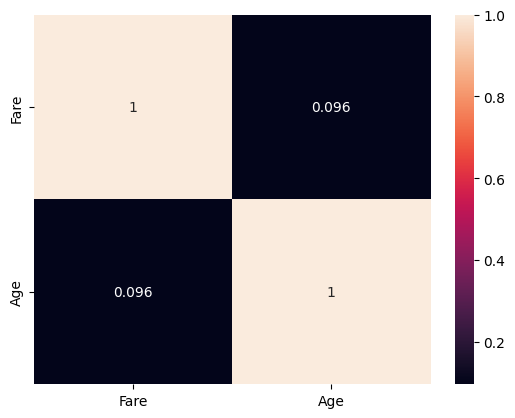

In [ ]:
sns.heatmap(training_set[['Fare', 'Age']].corr(), annot=True)

Text(0, 0.5, 'Возраст')

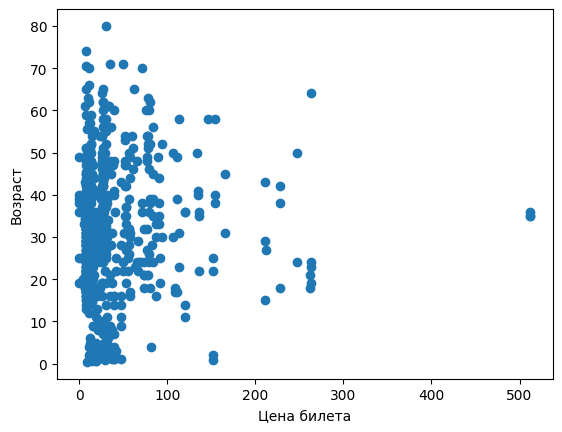

In [ ]:
plt.scatter(training_set[['Fare']], training_set[["Age"]])
plt.xlabel("Цена билета")
plt.ylabel("Возраст")

Text(0, 0.5, 'Возраст')

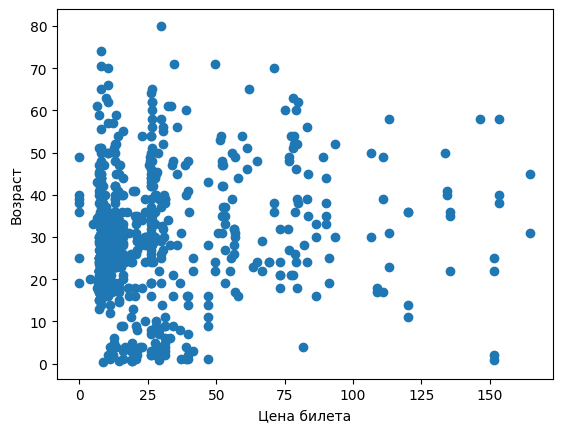

In [ ]:
plt.scatter(training_set[training_set['Fare']<200][['Fare']], training_set[training_set['Fare']<200][["Age"]])
plt.xlabel("Цена билета")
plt.ylabel("Возраст")

Корреляция между возрастом и ценой за билет есть, но она низкая. На диаграмме рассетвания видно, что билет по цене более, чем 75, в основном покупают люди в возрасте 20-50 лет

# 7 Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

Text(0.5, 1.0, 'Доля по классам среди выживших')

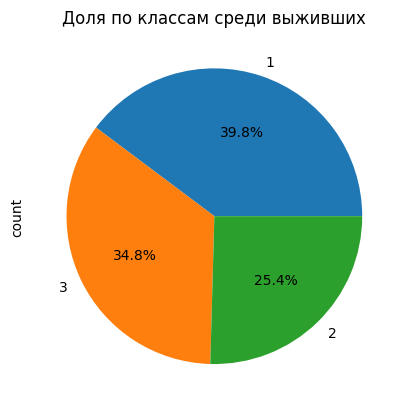

In [ ]:
survived = training_set[training_set['Survived'] == 1]
survived['Pclass'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Доля по классам среди выживших")

Вывод: большинство выживших ехали в первом классе с более дорогими билетами

Text(0.5, 1.0, 'Число выживших в каждом классе')

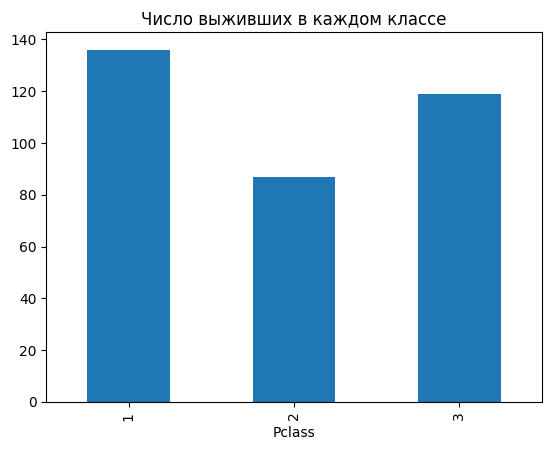

In [ ]:
training_set.groupby(['Pclass'])['Survived'].sum().plot.bar()
plt.title("Число выживших в каждом классе")

Вывод: В первом классе выжило больше человек, чем в остальных, но это може быть свзано с тем, что там больше людей ехало. Таким образом, скорее всего зависимость между выживаемостью и классами есть

# 8 Какова связь между стоимостью билета и портом отправления? Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне.

In [ ]:
training_set = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML5.5%20EDA/data/titanic.csv')
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print("Min =" , training_set.Fare.min())
print("Max =" , training_set.Fare.max())
print("Mean =" , training_set.Fare.mean())

Min = 0.0
Max = 512.3292
Mean = 32.204207968574636


In [ ]:
training_set.groupby(['Embarked'])['Fare'].mean()

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

Вывод:

Из порта С билеты дороже



# 9 Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.


Text(0.5, 1.0, 'Цены из города C')

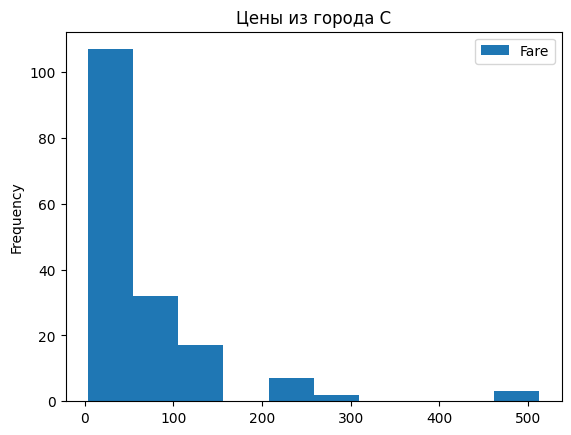

In [ ]:
training_set[training_set['Embarked'] == 'C'][['Fare']].plot.hist()
plt.title("Цены из города C")

Text(0.5, 1.0, 'Цены из города S')

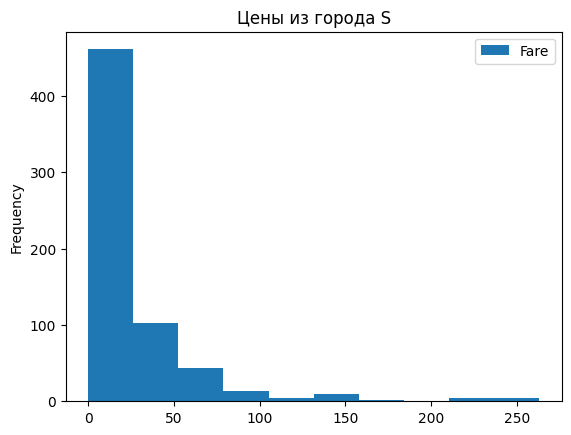

In [ ]:
training_set[training_set['Embarked'] == 'S'][['Fare']].plot.hist()
plt.title("Цены из города S")

Text(0.5, 1.0, 'Цены из города Q')

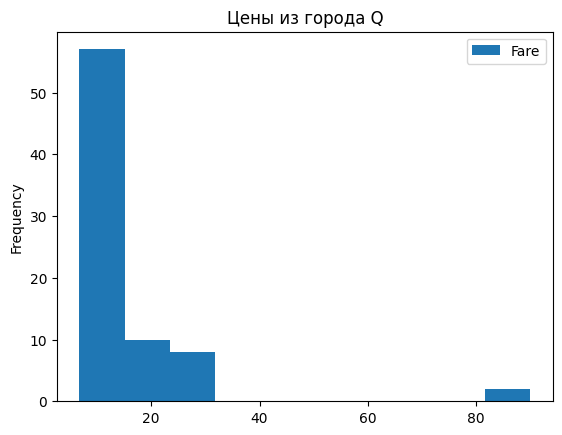

In [ ]:
training_set[training_set['Embarked'] == 'Q'][['Fare']].plot.hist()
plt.title("Цены из города Q")

Вывод: из всех городов большее число билетов по низкой цене

# 10 Оцените репрезентативность представленной выборки. Сколько всего было пассажиров Титаника? Сколько из них выжило? Какую долю составляет представленный набор данных от всей генеральной совокупности?


In [ ]:
print("Всего пассажиров Титаника = ", training_set.shape[0])
print("Выжило = ", training_set['Survived'].sum())


Всего пассажиров Титаника =  891
Выжило =  342


In [ ]:
print("Доля выборки от генеральной совокупности", 712/891*100)

Доля выборки от генеральной совокупности 79.91021324354658


# 11 Разделите выборку на тестовую и обучающую части при помощи train_test_split(). Изобразите на графиках распределение некоторых атрибутов и целевой переменной. Насколько однородно получившееся разбиение?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(data_modif.iloc[:,1:], data_modif.iloc[:,0], test_size=0.33, random_state=42)


<Axes: ylabel='Frequency'>

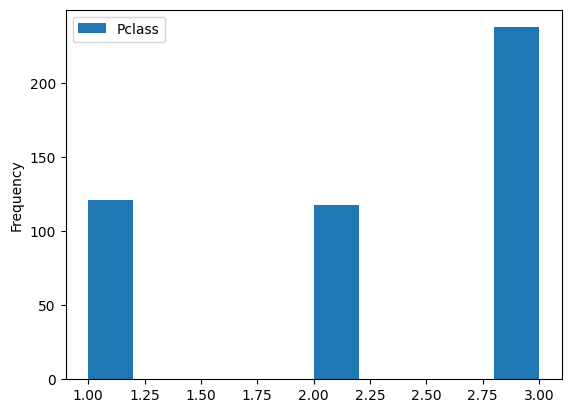

In [ ]:
X_train[['Pclass']].plot.hist()

<Axes: ylabel='Frequency'>

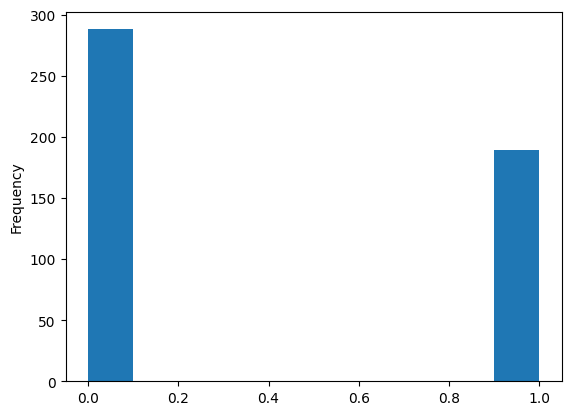

In [ ]:
y_train.plot.hist()

Вывод: распределение не однородное, в обучающей выборке больше погибших, чем выживших

# 12 Сбалансируйте классы в исходном датасете двумя способами:

# 13 Удалите лишние объекты мажоритарного класса (выбранные случайно)

In [ ]:
data_modif[['Survived']].value_counts()[0] - data_modif[['Survived']].value_counts()[1]

136

In [ ]:

to_drop = data_modif[data_modif['Survived'] == 0].sample(n=136, random_state=1)  # Удалить 136

data_modif_drop = data_modif.drop(to_drop.index)
data_modif_drop[['Survived']].value_counts()

Survived
0           288
1           288
Name: count, dtype: int64

# 14 Добавьте в выборку дубликаты миноритарного класса.

In [ ]:
to_add = data_modif[data_modif['Survived'] == 1].sample(n=136, random_state=20)  # Удалить 136


# Добавление дубликатов строк в DataFrame
data_modif_add = pd.concat([data_modif,to_add], ignore_index=True)
data_modif_add = data_modif_add.reset_index(drop=True)

data_modif_add[['Survived']].value_counts()

Survived
0           424
1           424
Name: count, dtype: int64

# 15 Проведите исследование эффективности простой модели классификации до и после данных преобразований.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(data_modif_drop.iloc[:,1:], data_modif_drop.iloc[:,0], test_size=0.33, random_state=42)
clf =  LogisticRegression().fit(X_train, y_train)
clf.score(X_test, y_test)

0.7591623036649214

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(data_modif_add.iloc[:,1:], data_modif_add.iloc[:,0], test_size=0.33, random_state=42)
clf =  LogisticRegression().fit(X_train, y_train)
clf.score(X_test, y_test)

0.7821428571428571

Вывод:

До балланса классов - score = 0.7829787234042553

После удаления строк - score = 0.7591623036649214

После добавления строк = 0.7821428571428571

Так как дисбаланс был небольшой, то изменения не сильно повлияли

# 16 Постройте корреляционную матрицу признаков после преобразования данных. Сделайте вывод о наличии либо отсутствии мультиколлинеарности признаков.

<Axes: >

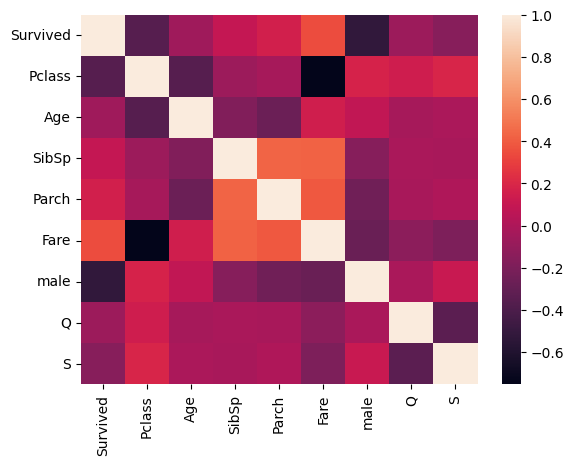

In [ ]:
sns.heatmap(data_modif_add.corr(method='spearman'))

Вывод:

По матрице видно, что сильная обратная корреляция у пола и выживших, у класса и пола, и сильная прямая корреляция у кол-ва родителей.детей и кол-ва братьев.сестер.супругов, а также количества детей.супругов и цены биллетов


# 17 Проведите группировку данных по значению возраста. Введите новый признак "возрастная категория", значениями которой будут "ребенок", "взрослый", "старик". Проведите анализ эффективности данного признака.


In [ ]:
def categorize_age(age):
    if age < 18:
        return 'ребенок'
    elif age < 60:
        return 'взрослый'
    else:
        return 'старик'
data_modif_add['ВозрастГруппа'] = data_modif_add['Age'].apply(categorize_age)
data_modif_add.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,ВозрастГруппа
0,0,3,22.0,1,0,7.2500,1,0,1,взрослый
1,1,1,38.0,1,0,71.2833,0,0,0,взрослый
2,1,3,26.0,0,0,7.9250,0,0,1,взрослый
3,1,1,35.0,1,0,53.1000,0,0,1,взрослый
4,0,3,35.0,0,0,8.0500,1,0,1,взрослый


Text(0.5, 1.0, 'Число выживших по возрасту')

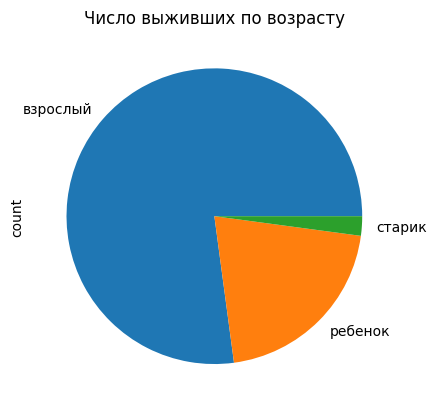

In [ ]:
data_modif_add[data_modif_add['Survived'] == 1]['ВозрастГруппа'].value_counts().plot.pie()
plt.title("Число выживших по возрасту")

Вывод: группировка по возрасту эффективн